<a href="https://colab.research.google.com/github/elisasmenendez/passionfruit-species-classifier/blob/main/CNN_Folhas_de_Maracuja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Convolucionais

## Pré-processamento

As Redes Neurais Convolucionais são mais adequadas para classificação de imagens. Nesta estratégia não é necessário utilizar todos os pixels da imagem pois são utilizados filtros para reduzir a dimensionalidade das imagens.

In [ ]:
#!pip install tensorflow==2.6.0

In [1]:
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
# Baixando o arquivo diretamente de um link compartilhável do Google Drive
# Assim não precisa montar o Drive toda vez
!gdown 1V-UqO4zKiCyhErteNcjUr8LqZHsITF5U

Downloading...
From: https://drive.google.com/uc?id=1V-UqO4zKiCyhErteNcjUr8LqZHsITF5U
To: /content/Dataset_Maracuja.zip
100% 175M/175M [00:07<00:00, 24.2MB/s]


In [ ]:
# Extraindo os arquivos
zip_object = zipfile.ZipFile(file = 'Dataset_Maracuja.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Treinamento e Teste

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,       # Mudar a escala para 0..1
                                         rotation_range=7,     # Rotações para gerar mais imagens
                                         horizontal_flip=True, 
                                         zoom_range=0.2)

In [ ]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/Dataset_Maracuja/training_set',
                                                              target_size = (64, 64), # Redimensionamento para 64x64
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 196 images belonging to 3 classes.


In [ ]:
dataset_treinamento.class_indices

{'Cincinnata': 0, 'Edulis': 1, 'Foetida': 2}

In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/Dataset_Maracuja/test_set',
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

Found 48 images belonging to 3 classes.


# Construção e treinamento da rede neural

In [ ]:
6 * 6 * 32

1152

In [ ]:
(1152 + 2) / 2

577.0

In [ ]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time
# Tempo de início
start = time.time()

In [ ]:
historico = network.fit(dataset_treinamento, epochs=100)

Epoch 1/100
25/25 [==============================] - 18s 617ms/step - loss: 0.9055 - accuracy: 0.5867
Epoch 2/100
25/25 [==============================] - 15s 617ms/step - loss: 0.5423 - accuracy: 0.7704
Epoch 3/100
25/25 [==============================] - 15s 590ms/step - loss: 0.5355 - accuracy: 0.7602
Epoch 4/100
25/25 [==============================] - 15s 588ms/step - loss: 0.4289 - accuracy: 0.8367
Epoch 5/100
25/25 [==============================] - 16s 642ms/step - loss: 0.3322 - accuracy: 0.8622
Epoch 6/100
25/25 [==============================] - 15s 596ms/step - loss: 0.1987 - accuracy: 0.9337
Epoch 7/100
25/25 [==============================] - 15s 586ms/step - loss: 0.2534 - accuracy: 0.9337
Epoch 8/100
25/25 [==============================] - 15s 581ms/step - loss: 0.2408 - accuracy: 0.9133
Epoch 9/100
25/25 [==============================] - 15s 582ms/step - loss: 0.1629 - accuracy: 0.9490
Epoch 10/100
25/25 [==============================] - 15s 613ms/step - loss: 0.160

In [ ]:
end = time.time()
print(end - start)

1888.1850316524506


# Avaliação da rede neural

In [ ]:
dataset_teste.class_indices

{'Cincinnata': 0, 'Edulis': 1, 'Foetida': 2}

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

48/48 [==============================] - 4s 74ms/step


array([[1.00000000e+00, 2.59449212e-10, 8.54164219e-14],
       [1.00000000e+00, 2.31249420e-09, 5.64246187e-14],
       [1.00000000e+00, 4.53487781e-09, 9.85099502e-12],
       [9.99997377e-01, 2.65209383e-06, 7.49304396e-10],
       [9.99933839e-01, 6.52770032e-05, 8.02292391e-07],
       [9.99862313e-01, 1.37635609e-04, 3.13695523e-08],
       [9.99417305e-01, 5.35811589e-04, 4.69059341e-05],
       [9.99999762e-01, 2.56063004e-07, 2.70137385e-12],
       [1.00000000e+00, 1.52234740e-08, 4.73332528e-12],
       [9.89024043e-01, 1.09759420e-02, 2.82485466e-08],
       [6.37650192e-01, 3.62288296e-01, 6.14746896e-05],
       [9.99301672e-01, 6.54160627e-04, 4.41702250e-05],
       [5.84136073e-10, 1.00000000e+00, 2.13362550e-10],
       [5.30319721e-06, 9.99983668e-01, 1.10901256e-05],
       [6.33340358e-09, 1.00000000e+00, 1.55885012e-08],
       [1.22665524e-05, 9.99987125e-01, 5.66328310e-07],
       [1.04233955e-07, 9.99999881e-01, 7.40826220e-11],
       [2.37144800e-11, 1.00000

In [ ]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2])

In [ ]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

In [ ]:
# Abordagem CNN - 0.90
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.9375

In [ ]:
dataset_teste.class_indices

{'Cincinnata': 0, 'Edulis': 1, 'Foetida': 2}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      1.00      0.89        12
           2       1.00      0.88      0.93        24

    accuracy                           0.94        48
   macro avg       0.93      0.96      0.94        48
weighted avg       0.95      0.94      0.94        48



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  3, 21]])

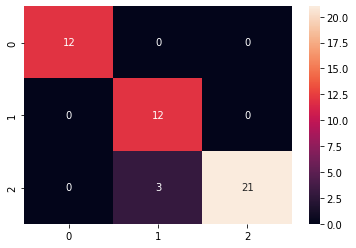

In [ ]:
sns.heatmap(cm, annot=True);